In [12]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [102]:
x, lamda, E, I, l, F_0 = sp.symbols("x, lamda, E, I_yy, l, F_0")
w = sp.symbols("w", cls=sp.Function)

dif_eq = sp.Eq(w(x).diff(x, x, x, x) + (lamda**2) * w(x).diff(x, x), (F_0)/(E*I))

initial_conditions = {
    w(0): 0,
    w(l): 0,
    w(x).diff(x, x).subs(x, 0): 0,
    w(x).diff(x, x).subs(x, l): 0
}
dif_eq

Eq(lamda**2*Derivative(w(x), (x, 2)) + Derivative(w(x), (x, 4)), F_0/(E*I_yy))

In [103]:
sol = sp.dsolve(dif_eq)
sol

Eq(w(x), C1 + C2*x + C3*exp(-I*lamda*x) + C4*exp(I*lamda*x) + F_0*x**2/(2*E*I_yy*lamda**2))

In [105]:
sol_ics = sp.dsolve(dif_eq, ics=initial_conditions)
sol_ics

Eq(w(x), F_0*exp(I*l*lamda)*exp(-I*lamda*x)/(E*I_yy*lamda**4*exp(I*l*lamda) + E*I_yy*lamda**4) + F_0*exp(I*lamda*x)/(E*I_yy*lamda**4*exp(I*l*lamda) + E*I_yy*lamda**4) - F_0*l*x/(2*E*I_yy*lamda**2) + F_0*x**2/(2*E*I_yy*lamda**2) - F_0/(E*I_yy*lamda**4))

In [106]:
limit_sol = sp.Limit(sol_ics.args[1], lamda, 0)
limit_sol_answer = limit_sol.doit().simplify()
limit_sol_answer

F_0*x*(l**3 - 2*l*x**2 + x**3)/(24*E*I_yy)

In [107]:
sol_ics_p = sol_ics.subs(x, l/2)
sol_ics_p

Eq(w(l/2), 2*F_0*exp(I*l*lamda/2)/(E*I_yy*lamda**4*exp(I*l*lamda) + E*I_yy*lamda**4) - F_0*l**2/(8*E*I_yy*lamda**2) - F_0/(E*I_yy*lamda**4))

In [114]:
sol_ics_final = sol_ics_p.subs(sp.exp(-sp.I * l * lamda), sp.cos(lamda*l)-sp.I*sp.sin(lamda*l))
sol_ics_final = sol_ics_p.subs(sp.exp(sp.I * l * lamda/2), sp.cos(lamda*l/2)-sp.I*sp.sin(lamda*l/2))
print(sol_ics_final)

Eq(w(l/2), 2*F_0*(-I*sin(l*lamda/2) + cos(l*lamda/2))/(E*I_yy*lamda**4*(-I*sin(l*lamda/2) + cos(l*lamda/2))**2 + E*I_yy*lamda**4) - F_0*l**2/(8*E*I_yy*lamda**2) - F_0/(E*I_yy*lamda**4))


In [121]:
r, a = sp.symbols("r, a")
f = sp.symbols("f", cls=sp.Function)
final_eq = sp.Eq(f(r, a),-(r * (8 +a**2-8*sp.sec(a/2)))/(8*a**4))
final_eq

Eq(f(r, a), -r*(a**2 - 8*sec(a/2) + 8)/(8*a**4))

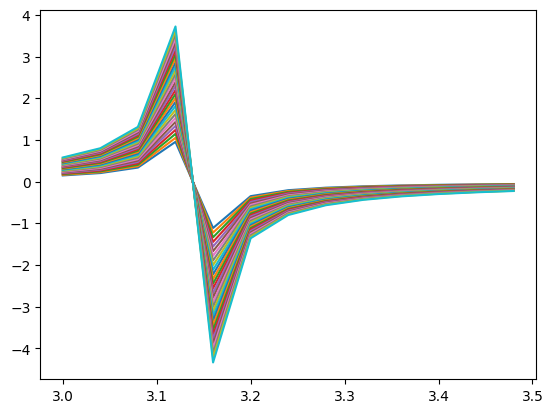

In [138]:
x_axis = np.arange(3, 3.5, 0.04)
for i in np.arange(1, 4, 0.1):
    final = final_eq.args[1].subs(r, i)
    y_axis = sp.lambdify(a, final, "numpy")
    y_axis = y_axis(x_axis)
    plt.plot(x_axis, y_axis)